# Лабораторная работа 6
## Анализ и прогнозирование временного ряда.
Цель лабораторной работы: изучение основных методов анализа и прогнозирование временных рядов.
### Задание:
Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.
Визуализируйте временной ряд и его основные характеристики.
Разделите временной ряд на обучающую и тестовую выборку.
Произведите прогнозирование временного ряда с использованием как минимум двух методов.
Визуализируйте тестовую выборку и каждый из прогнозов.
Оцените качество прогноза в каждом случае с помощью метрик.

Задача прогнозирования временного ряда может быть сформулирована как поиск модели M:
Входными данными модели, на которых она обучается, являются известные значения временного ряда y1...yi−1.
Также на вход модели могут поступать гиперпараметры H.
Выходными данными модели являются прогнозируемые значения временного ряда yi...yi+k, где k - горизонт прогноза.
Существует вариант постановки задачи, в которой значение yi зависит не только от предыдущих значений y, но и от матрицы X, но такую постановку мы детально не рассматриваем.
Горизонт прогноза - это количество временных интервалов, на глубину которых выполняется прогноз. Как правило, составляет не более 1/3 от длины временного ряда. С точки зрения горизонта прогноза, прогнозы делятся на:
- краткосрочные;
- среднесрочные;
- долгосрочные.
Метриками оценки качеcтва прогнозирования обычно являются регрессионные метрики (MAE, MSE, ...).

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('./AAPL.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


## Визуализация временного ряда и его основных характеристик

In [3]:
data.shape

(1258, 15)

In [4]:
data.dtypes

Unnamed: 0       int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [5]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
symbol - 0
date - 0
close - 0
high - 0
low - 0
open - 0
volume - 0
adjClose - 0
adjHigh - 0
adjLow - 0
adjOpen - 0
adjVolume - 0
divCash - 0
splitFactor - 0


In [6]:
# Основные статистические характеристки набора данных
data.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


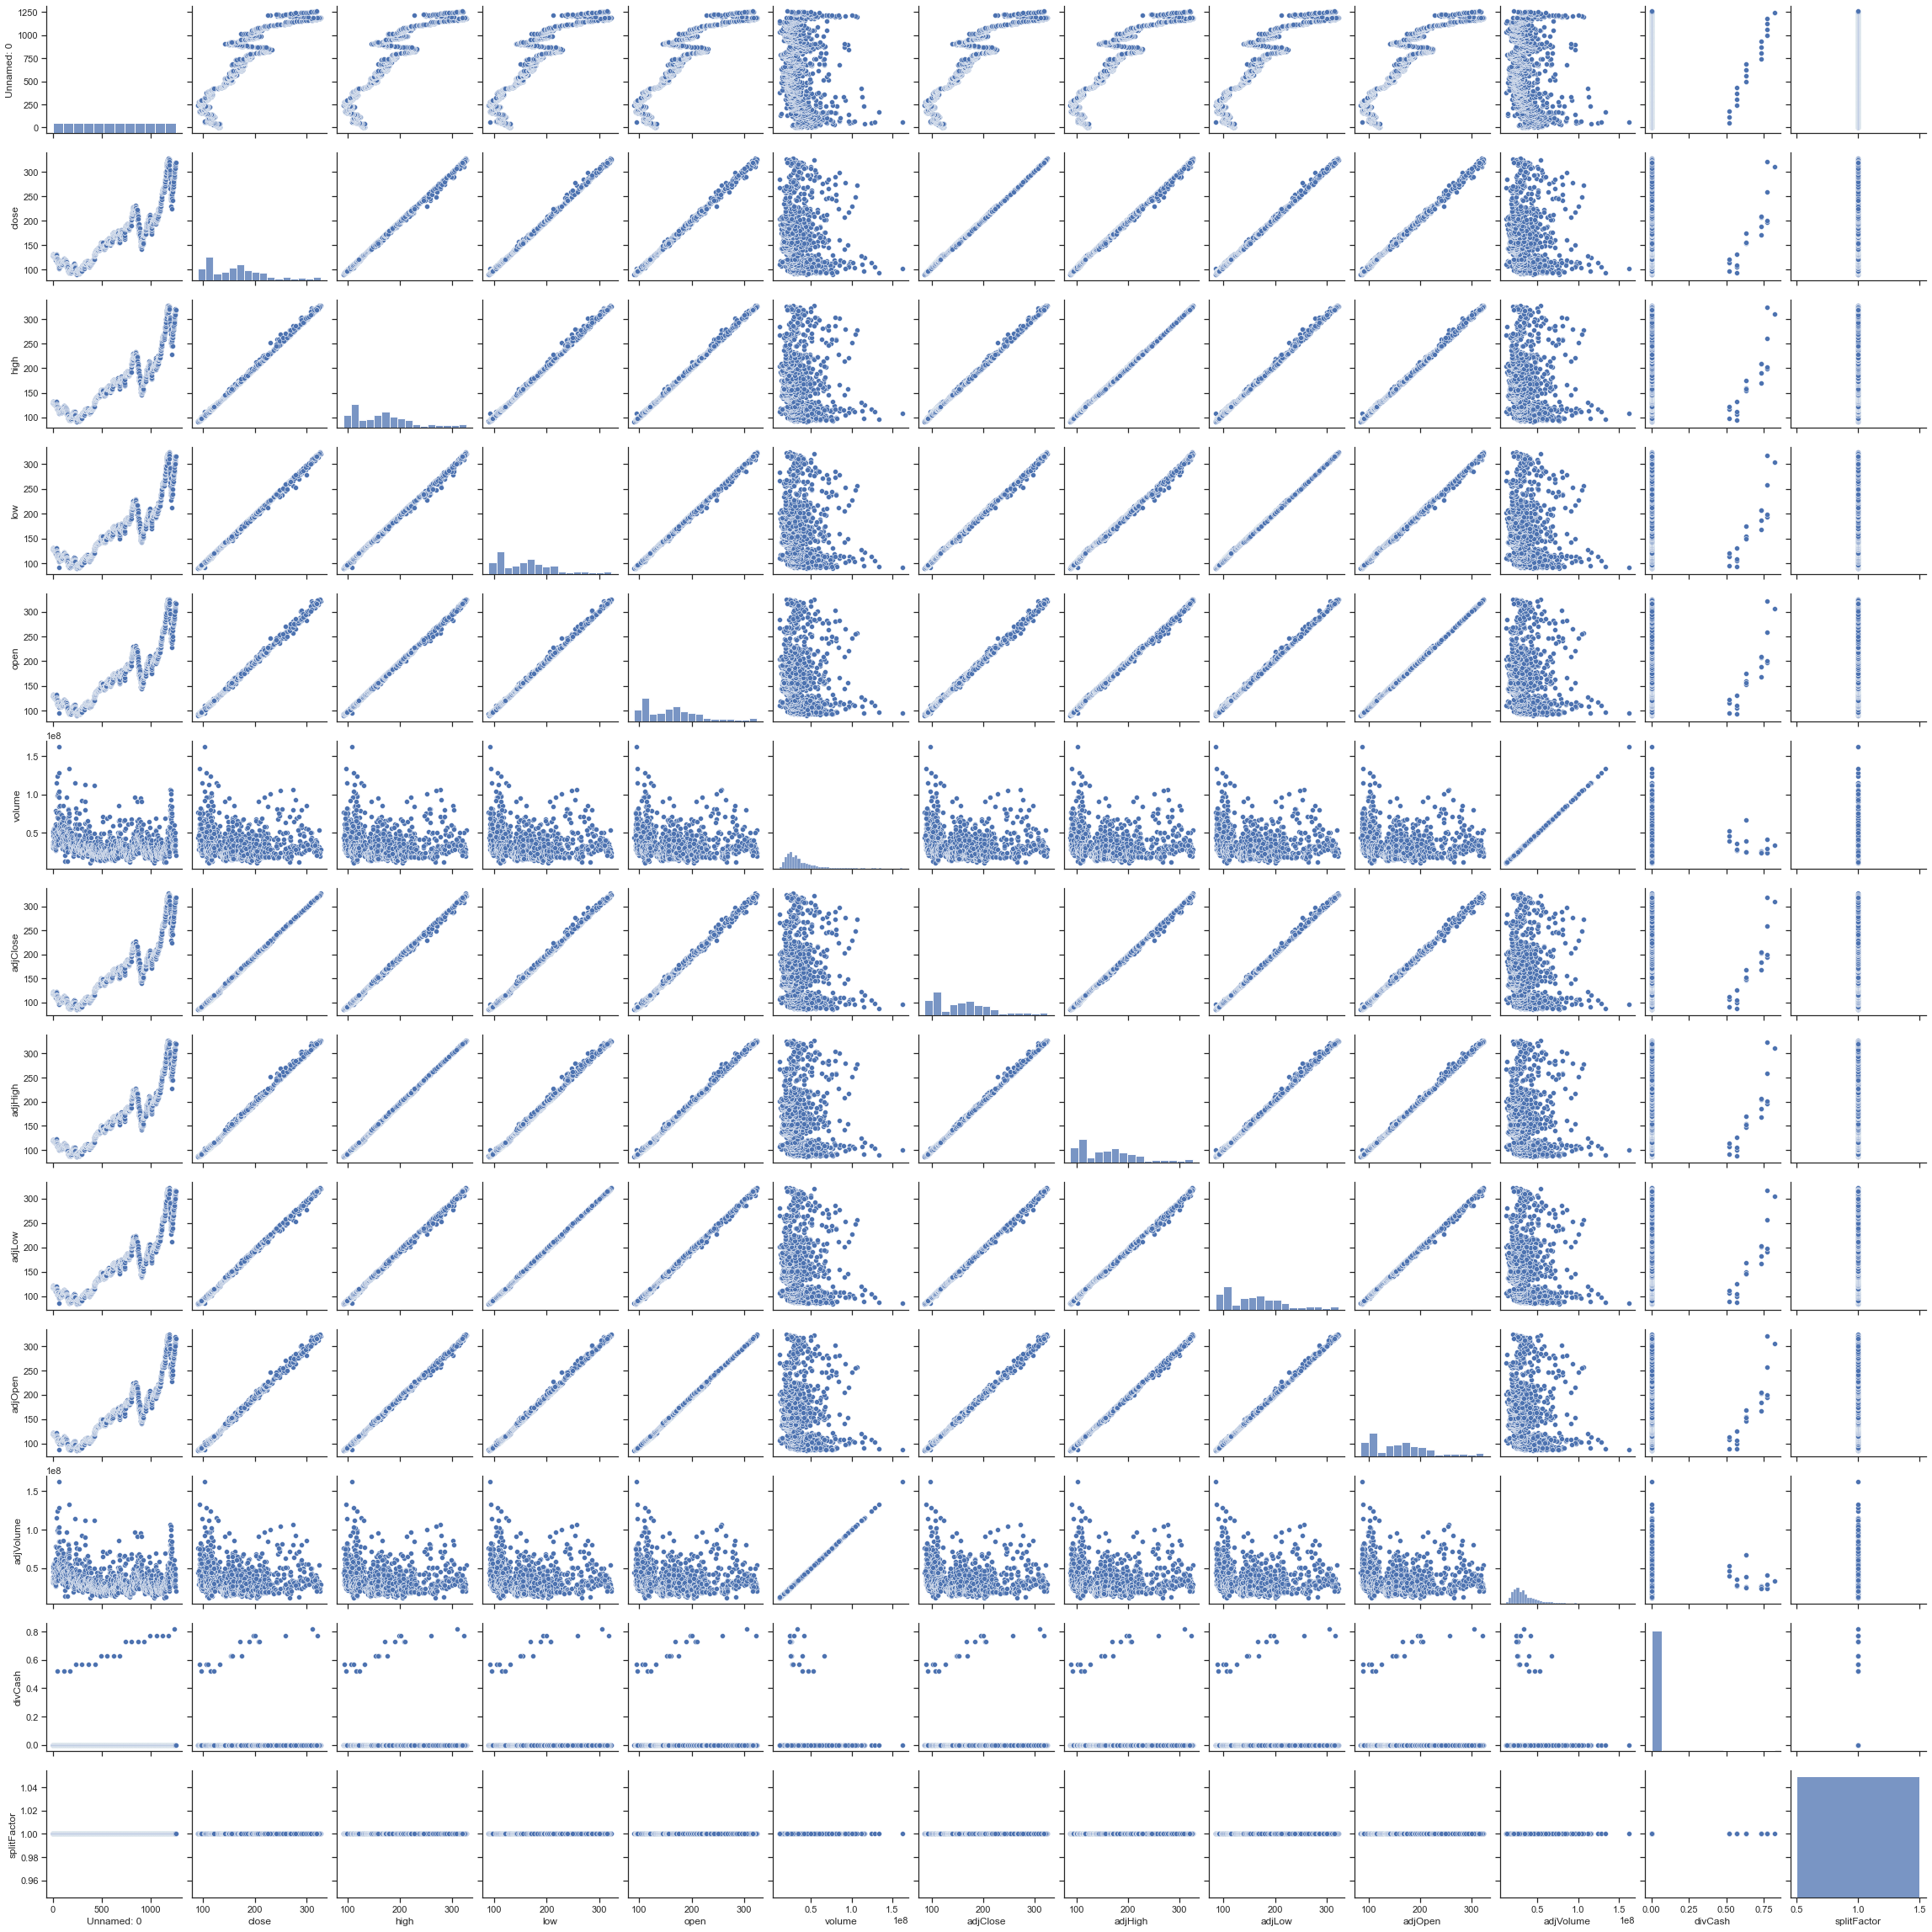

In [7]:
sns.pairplot(data)

In [8]:
data.corr()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
Unnamed: 0,1.000000,0.898253,0.898986,0.898028,0.898510,-0.210944,0.906781,0.907413,0.906678,0.907100,-0.210944,0.025511,NaN
close,0.898253,1.000000,0.999446,0.999473,0.999070,-0.139941,0.999710,0.999118,0.999276,0.998848,-0.139941,0.031930,NaN
high,0.898986,0.999446,1.000000,0.999146,0.999503,-0.124726,0.999251,0.999714,0.999033,0.999328,-0.124726,0.031200,NaN
low,0.898028,0.999473,0.999146,1.000000,0.999488,-0.152665,0.999135,0.998759,0.999703,0.999171,-0.152665,0.031922,NaN
open,0.898510,0.999070,0.999503,0.999488,1.000000,-0.138214,0.998801,0.999148,0.999265,0.999706,-0.138214,0.032833,NaN
volume,-0.210944,-0.139941,-0.124726,-0.152665,-0.138214,1.000000,-0.141219,-0.126855,-0.153230,-0.139630,1.000000,-0.017023,NaN
adjClose,0.906781,0.999710,0.999251,0.999135,0.998801,-0.141219,1.000000,0.999497,0.999522,0.999160,-0.141219,0.032559,NaN
adjHigh,0.907413,0.999118,0.999714,0.998759,0.999148,-0.126855,0.999497,1.000000,0.999226,0.999551,-0.126855,0.031844,NaN
adjLow,0.906678,0.999276,0.999033,0.999703,0.999265,-0.153230,0.999522,0.999226,1.000000,0.999538,-0.153230,0.032560,NaN
adjOpen,0.907100,0.998848,0.999328,0.999171,0.999706,-0.139630,0.999160,0.999551,0.999538,1.000000,-0.139630,0.033402,NaN


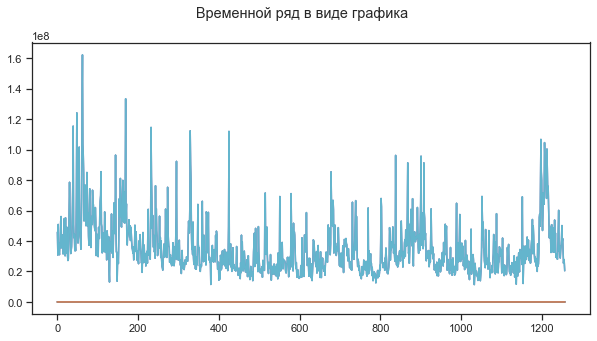

In [19]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
data.plot(ax=ax, legend=False)
plt.show()

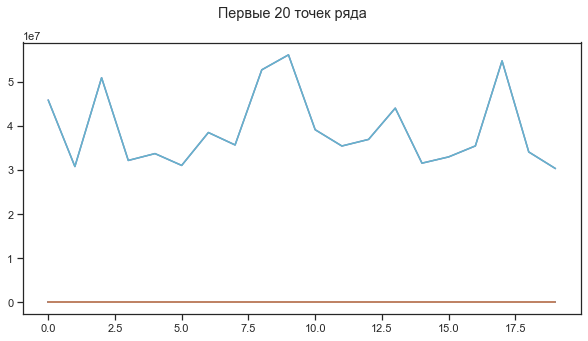

In [21]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
data[:20].plot(ax=ax, legend=False)
plt.show()

## Разделение на обучающую и тестовую выборки 